<a href="https://colab.research.google.com/github/shivaganesh720/OIBSIP/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
f1 = files.upload()
print(f1)

Saving car data.csv to car data (6).csv
{'car data (6).csv': b'Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\nertiga,2015,7.25,10.7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error



In [ ]:
df = pd.read_csv("car data.csv")

In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


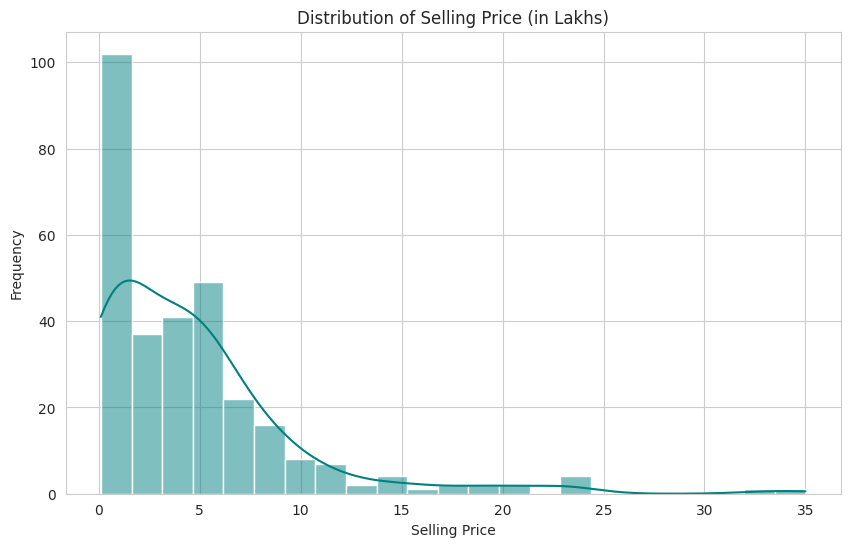

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, color='teal')
plt.title('Distribution of Selling Price (in Lakhs)')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

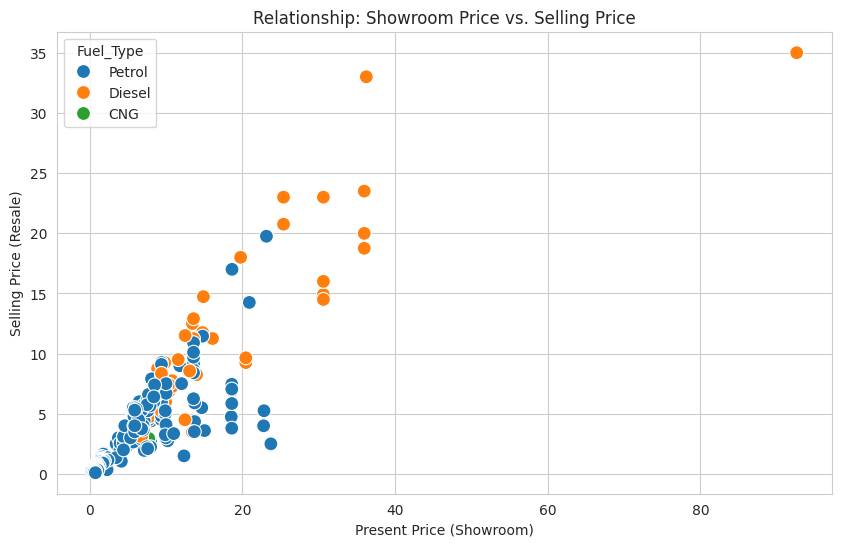

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', s=100)
plt.title('Relationship: Showroom Price vs. Selling Price')
plt.xlabel('Present Price (Showroom)')
plt.ylabel('Selling Price (Resale)')
plt.show()

/tmp/ipython-input-3908565641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')


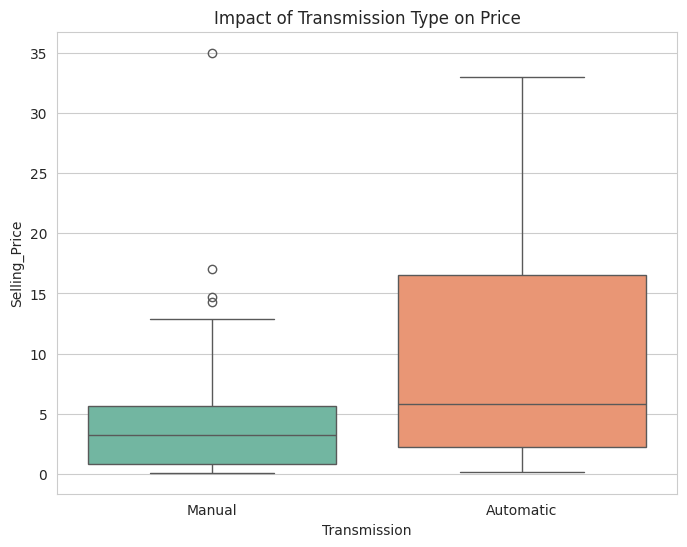

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')
plt.title('Impact of Transmission Type on Price')
plt.show()

/tmp/ipython-input-2511067361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Pastel1')


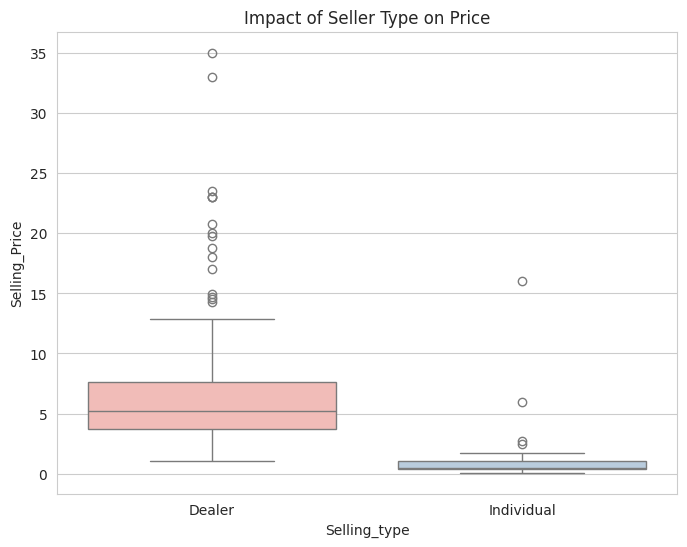

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Pastel1')
plt.title('Impact of Seller Type on Price')
plt.show()

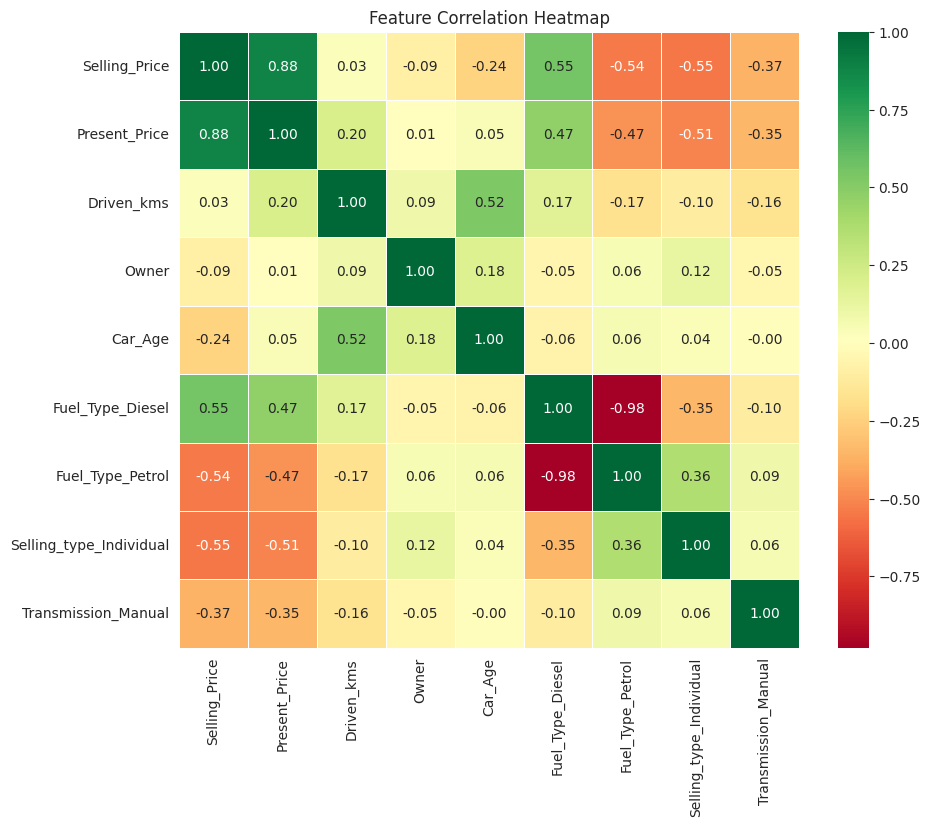

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_model.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
current_year = date.today().year
df['Car_Age'] = current_year - df['Year']


df_model = df.drop(['Car_Name', 'Year'], axis=1)

df_model = pd.get_dummies(df_model, drop_first=True)

print(df_model.columns.tolist())

['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']


In [ ]:
X = df_model.drop('Selling_Price', axis=1)
y = df_model['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ExtraTreesRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)

print(f"Model Accuracy (R2 Score): {accuracy*100}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)} Lakhs")


Model Accuracy (R2 Score): 97.2928585175991%
Mean Absolute Error: 0.4926557377049185 Lakhs


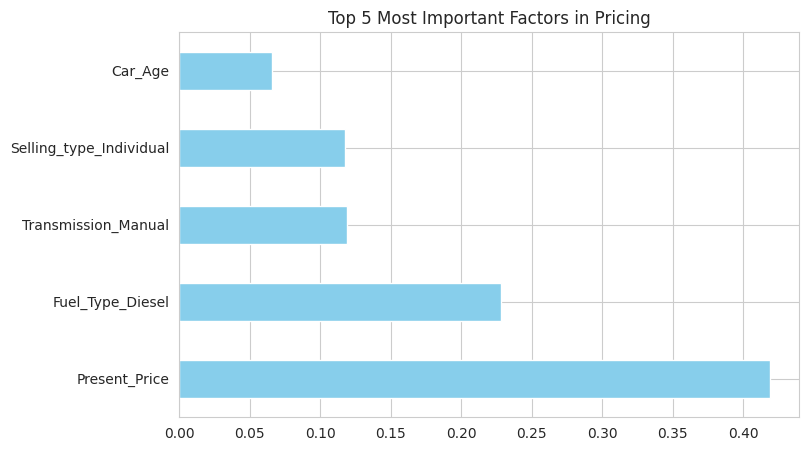

In [ ]:
plt.figure(figsize=(8, 5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Important Factors in Pricing')
plt.show()


In [ ]:
def predict_my_car_price(present_price, kms, owner, age, fuel, seller, trans):

    input_df = pd.DataFrame(columns=X.columns)
    input_df.loc[0] = 0

    input_df['Present_Price'] = present_price
    input_df['Driven_kms'] = kms
    input_df['Owner'] = owner
    input_df['Car_Age'] = age

    if fuel == 'Diesel': input_df['Fuel_Type_Diesel'] = 1
    if fuel == 'Petrol': input_df['Fuel_Type_Petrol'] = 1
    if seller == 'Individual': input_df['Selling_type_Individual'] = 1
    if trans == 'Manual': input_df['Transmission_Manual'] = 1

    prediction = model.predict(input_df)
    return round(prediction[0], 2)

my_car_price = predict_my_car_price(
    present_price = 12.0,
    kms = 42000,
    owner = 0,
    age = 4,
    fuel = 'diesel',
    seller = 'dealer',
    trans = 'Manual'
)

print(f"The estimated resale price for this car is: {my_car_price} Lakhs")

The estimated resale price for this car is: 9.28 Lakhs


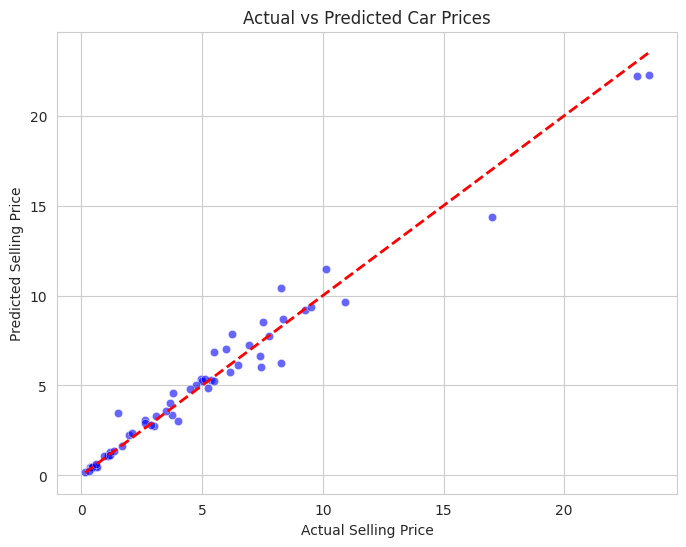

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, ls='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()